In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

import string
import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [15]:
messages = pd.read_csv('complete_dataset.csv')

In [16]:
messages.head()

,label,text
0,1,Enter your PIN to proceed
1,1,"Suspicious activity detected, confirm your OTP"
2,1,Fraud alert: please enter your card number
3,1,Please provide your card number for verification
4,1,"Your account has been flagged, confirm your on..."


In [17]:
messages.tail()

,label,text
107966,0,Weâ€™ve received your request and are processi...
107967,1,Your debit card has been blocked. Please provi...
107968,1,Your account is compromised. Kindly provide yo...
107969,1,Your debit card has been blocked. Please provi...
107970,0,Can I assist you with resetting your password?


In [18]:
messages.columns = ["label", "message"]

## EDA

In [19]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107971 entries, 0 to 107970
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   label    107971 non-null  int64 
 1   message  107971 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [20]:
messages.describe()

,label
count,107971.000000
mean,0.482370
std,0.499691
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [21]:
messages.groupby('label').describe().T

label                                             0  \
message count                                 55889   
        unique                                 4854   
        top     Your recent purchase was successful   
        freq                                   5089   

label                                                           1  
message count                                               52082  
        unique                                               1135  
        top     Your account has been flagged, confirm your on...  
        freq                                                 5104

In [22]:
len(messages)

107971

In [23]:
# Removing Duplicates if any

messages = messages.drop_duplicates()

In [24]:
len(messages)

5989

In [25]:
messages.groupby('label').describe().T

label                                         0                          1
message count                              4854                       1135
        unique                             4854                       1135
        top     Thank you for using our service  Enter your PIN to proceed
        freq                                  1                          1

In [26]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,1,Enter your PIN to proceed,25
1,1,"Suspicious activity detected, confirm your OTP",46
2,1,Fraud alert: please enter your card number,42
3,1,Please provide your card number for verification,48
4,1,"Your account has been flagged, confirm your on...",61


In [27]:
# Counting the frequency of top 5 messages.
messages['message'].value_counts().rename_axis(['message']).reset_index(name='counts').head()

,message,counts
0,Enter your PIN to proceed,1
1,I will take care of financial problem.i will h...,1
2,Want to finally have lunch today?,1
3,I will reach ur home in &lt;#&gt; minutes,1
4,Yeah my usual guy's out of town but there're d...,1


## Data Visualization

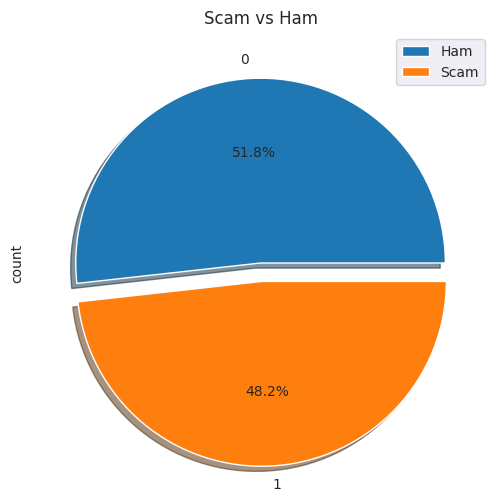

In [14]:
messages["label"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Scam vs Ham")
plt.legend(["Ham", "Scam"])
plt.show()

Text(0, 0.5, 'Frequency')

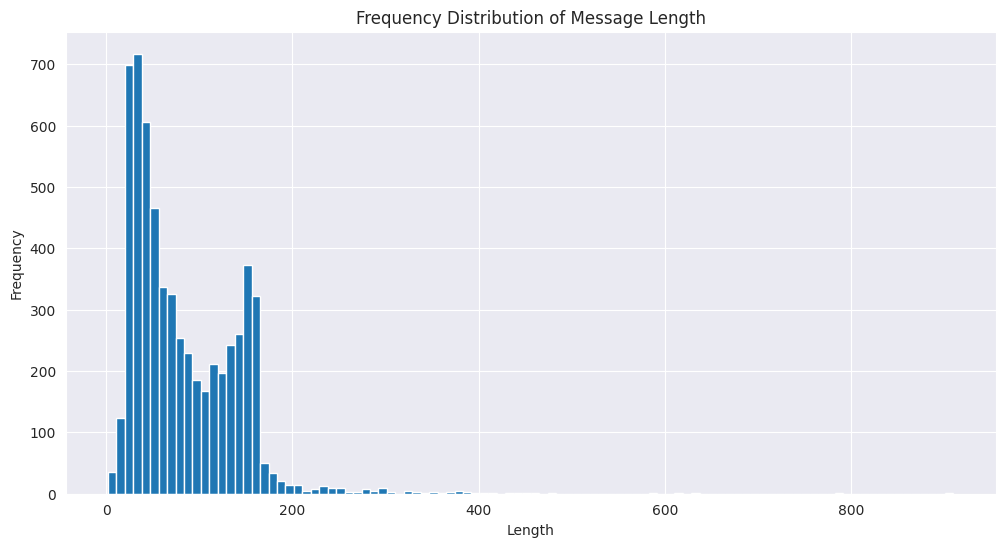

In [28]:
plt.figure(figsize=(12,6))
messages['length'].plot(bins=100, kind='hist') # with 100 length bins (100 length intervals)
plt.title("Frequency Distribution of Message Length")
plt.xlabel("Length")
plt.ylabel("Frequency")

In [29]:
messages['length'].describe()

,length
count,5989.000000
mean,83.093004
std,58.627840
min,2.000000
25%,38.000000
50%,66.000000
75%,126.000000
max,910.000000


In [30]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

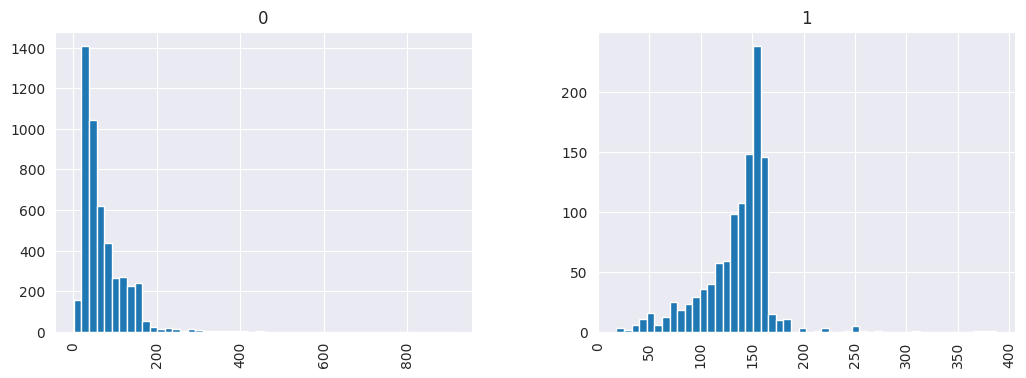

In [31]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

In [ ]:
def text_preprocess(mess):
    # Checking characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Joining the characters again to form the string.
    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower()

    # Removing any stopwords and non alphabets
    nostop=[word for word in nopunc.split() if word.lower() not in stopwords.words('english') and word.isalpha()]

    return nostop

In [ ]:
spam_messages = messages[messages["label"] == 1]["message"]
ham_messages = messages[messages["label"] == 0]["message"]
print("No of spam messages : ",len(spam_messages))
print("No of ham messages : ",len(ham_messages))

No of spam messages :  1135
No of ham messages :  4854


## Wordcloud

In [ ]:
spam_words = text_preprocess(spam_messages)

In [ ]:
spam_words[:10]

['enter',
 'pin',
 'proceedsuspicious',
 'activity',
 'confirm',
 'otpfraud',
 'please',
 'enter',
 'card',
 'numberplease']

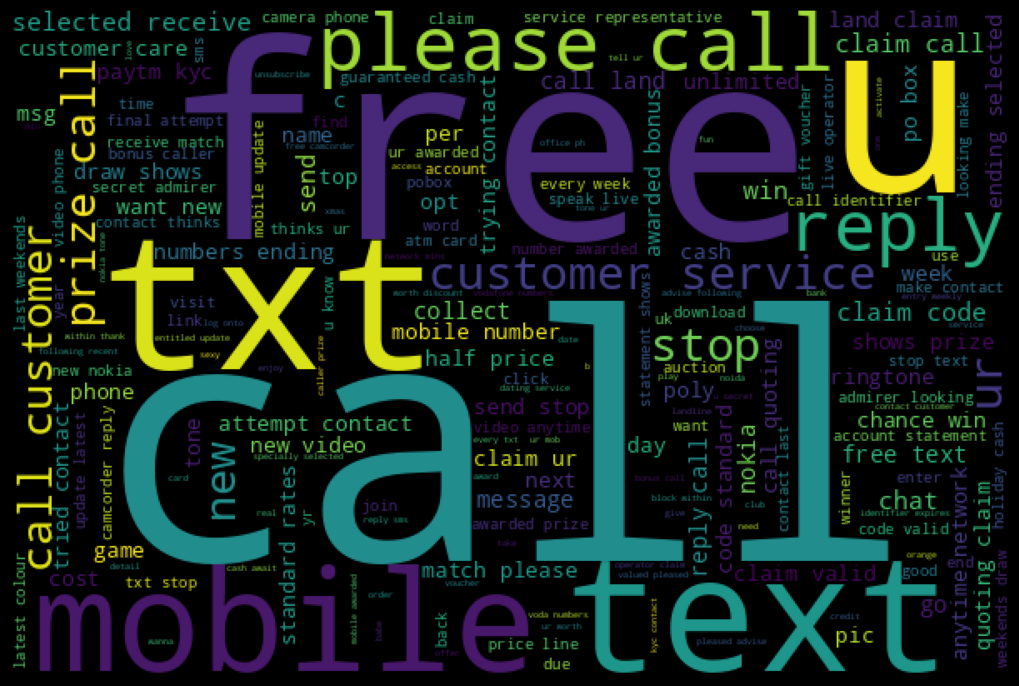

In [ ]:
spam_wordcloud = WordCloud(width=600, height=400).generate(' '.join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
print("Top 10 Spam words are :\n")
print(pd.Series(spam_words).value_counts().head(10))

Top 10 Spam words are :

call       501
free       201
claim      159
mobile     153
ur         141
txt        138
reply      136
text       116
u          115
contact    108
Name: count, dtype: int64


In [ ]:
ham_words = text_preprocess(ham_messages)

In [ ]:
ham_words[:10]

['thank',
 'using',
 'serviceyour',
 'payment',
 'receivedthank',
 'paymentyour',
 'account',
 'good',
 'standingyour',
 'transaction']

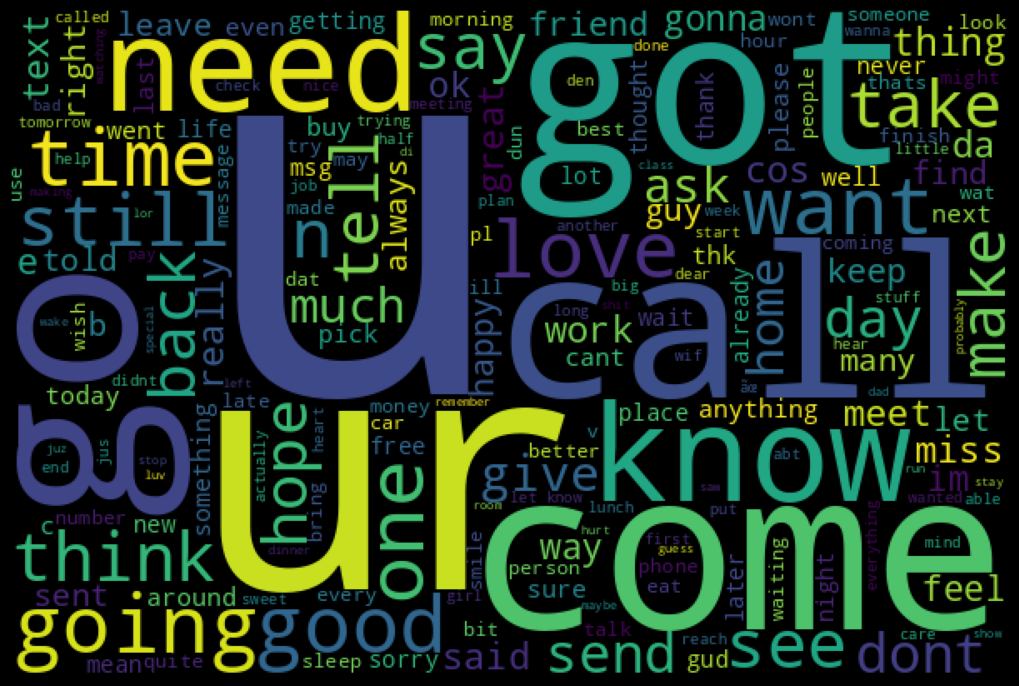

In [ ]:
ham_wordcloud = WordCloud(width=600, height=400).generate(' '.join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
print("Top 10 Ham words are :\n")
print(pd.Series(ham_words).value_counts().head(10))

Top 10 Ham words are :

u        838
get      282
ur       240
go       235
like     215
got      215
know     205
come     205
call     197
going    152
Name: count, dtype: int64


## Data Transformation

In [ ]:
messages.head()

,label,message,length
0,1,Enter your PIN to proceed,25
1,1,"Suspicious activity detected, confirm your OTP",46
2,1,Fraud alert: please enter your card number,42
3,1,Please provide your card number for verification,48
4,1,"Your account has been flagged, confirm your on...",61


In [ ]:
messages["message"] = messages["message"].apply(text_preprocess)

In [ ]:
messages["message"] = messages["message"].agg(lambda x: ' '.join(map(str, x)))

<ipython-input-45-9edb9df9b933>:2: FutureWarning: using <function <lambda> at 0x794dfad3a9e0> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  messages["message"] = messages["message"].agg(lambda x: ' '.join(map(str, x)))


In [ ]:
messages.head()

,label,message,length
0,1,enter pin proceed,25
1,1,suspicious activity detected confirm otp,46
2,1,fraud alert please enter card number,42
3,1,please provide card number verification,48
4,1,account flagged confirm onetime password,61


In [ ]:
list(messages["message"])[7]

'unauthorized access attempt detected enter pin'

In [ ]:
messages.head()

,label,message,length
0,1,enter pin proceed,25
1,1,suspicious activity detected confirm otp,46
2,1,fraud alert please enter card number,42
3,1,please provide card number verification,48
4,1,account flagged confirm onetime password,61


## Creating Bag Of Words

In [ ]:
# Passing already processed messages (after removing punctuations and stopwords)

vectorizer = CountVectorizer()
bow_transformer = vectorizer.fit(messages['message'])

print("20 Bag of Words (BOW) Features: \n")
print(vectorizer.get_feature_names_out()[20:40])

print("\nTotal number of vocab words : ",len(vectorizer.vocabulary_))

20 Bag of Words (BOW) Features: 

['abnormally' 'aboutas' 'abroad' 'absence' 'absolutely' 'abstract' 'abt'
 'abta' 'aburo' 'abuse' 'abusers' 'ac' 'academic' 'acc' 'accent'
 'accenture' 'accept' 'accepted' 'access' 'accessed']

Total number of vocab words :  8723


In [ ]:
message4 = messages['message'][3]
print(message4)

please provide card number verification


In [ ]:
# fit_transform : Learn the vocabulary dictionary and return term-document matrix.
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 1080)	1
  (0, 5106)	1
  (0, 5604)	1
  (0, 5872)	1
  (0, 8096)	1
(1, 8723)


In [ ]:
print(bow_transformer.get_feature_names_out()[5945])

questionstd


In [ ]:
messages_bow = bow_transformer.transform(messages['message'])

In [ ]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5989, 8723)
Amount of Non-Zero occurences:  48171


## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [ ]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 1080)	0.40661292738014404
  (0, 5106)	0.34325348550134854
  (0, 5604)	0.3063271155585966
  (0, 5872)	0.55172691902912
  (0, 8096)	0.5644502432196394


In [ ]:
print(bow_transformer.get_feature_names_out()[5945])
print(bow_transformer.get_feature_names_out()[3141])

questionstd
hannaford


In [ ]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['say']])

5.220509876631288


In [ ]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5989, 8723)


In [ ]:
messages["message"][:10]

,message
0,enter pin proceed
1,suspicious activity detected confirm otp
2,fraud alert please enter card number
3,please provide card number verification
4,account flagged confirm onetime password
10,need card number resolve issue
17,enter otp prevent account suspension
18,unauthorized access attempt detected enter pin
25,pin required validate transaction
31,onetime password otp


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features = vec.fit_transform(messages["message"])
print(features.shape)

print(len(vec.vocabulary_))

(5989, 8567)
8567


## Train Test Split

In [ ]:
msg_train, msg_test, label_train, label_test = \
train_test_split(messages_tfidf, messages['label'], test_size=0.2)

In [ ]:
print("train dataset features size : ",msg_train.shape)
print("train dataset label size", label_train.shape)

print("\n")

print("test dataset features size", msg_test.shape)
print("test dataset lable size", label_test.shape)

train dataset features size :  (4791, 8723)
train dataset label size (4791,)


test dataset features size (1198, 8723)
test dataset lable size (1198,)


## Running ML Models

In [ ]:
## Creating ML Pipeline

models_list = {'MultiNomialNB': MultinomialNB(),
               'DecisionTreeClassifier': DecisionTreeClassifier(),
               'RandomForestClassifier': RandomForestClassifier(),
               'XGBoostClassifier': XGBClassifier()}

for model_name, model in models_list.items():
  print(f"Running {model_name}\n")
  clf = model
  spam_detect_model = clf.fit(msg_train, label_train)

  label_predictions = spam_detect_model.predict(msg_test)

  print(metrics.classification_report(label_test, label_predictions))

  # Printing the Overall Accuracy of the model
  accuracy = metrics.accuracy_score(label_test, label_predictions) * 100

  print(f"Accuracy of the model : {accuracy}")

  print("\n\n")

Running MultiNomialNB

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.98      0.79      0.88       233

    accuracy                           0.96      1198
   macro avg       0.97      0.90      0.93      1198
weighted avg       0.96      0.96      0.96      1198

Accuracy of the model : 95.74290484140234



Running DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       965
           1       0.86      0.88      0.87       233

    accuracy                           0.95      1198
   macro avg       0.91      0.92      0.92      1198
weighted avg       0.95      0.95      0.95      1198

Accuracy of the model : 94.74123539232053



Running RandomForestClassifier

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.99      0.79      0.88       233

    a

In [ ]:
test = bow_transformer.transform(["Dear we have recieved your payment"])
print(test)
print(test.shape)
test = tfidf_transformer.transform(test)

  (0, 1760)	1
  (0, 5454)	1
(1, 8723)


In [ ]:
clf.predict(test)[0]

0

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Saving Model

In [ ]:
import pickle

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

## Saving TF-ID Vectorizer

In [ ]:
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(bow_transformer, file)

In [ ]:
with open('messages_bow.pkl', 'wb') as file:
    pickle.dump(messages_bow, file)

In [ ]:
!pip3 freeze > requirements.txt

## TO IGNORE

In [ ]:
pd.DataFrame(messages_tfidf)

,0
0,"(0, 2264)\t0.5051691691860187\n (0, 5562)\t..."
1,"(0, 73)\t0.4469453920112795\n (0, 1464)\t0...."
2,"(0, 199)\t0.47714675350500485\n (0, 1080)\t..."
3,"(0, 1080)\t0.40661292738014404\n (0, 5106)\..."
4,"(0, 51)\t0.328324971217734\n (0, 1464)\t0.4..."
...,...
5984,"(0, 794)\t0.43019104597970487\n (0, 1080)\t..."
5985,"(0, 51)\t0.3784279516261307\n (0, 67)\t0.52..."
5986,"(0, 442)\t0.6134616119740806\n (0, 5432)\t0..."
5987,"(0, 51)\t0.2773967489095928\n (0, 1080)\t0...."


No charts were generated by quickchart
